### Trabalho PySpark

Autores:

- Igor da Silva Cassolli
- Jones Marlos Pinheiro da Rosa

## Objetivos e dados relevantes:

### Dados:

##### Análise de Gravidade
    - Quantidade total de feridos (feridos), feridos graves (feridos_gr), mortes (mortes), mortes pós-acidente (morte_post) e acidentes fatais (fatais).
    - Calcule o percentual de acidentes com vítimas fatais em relação ao total.
    - Pergunta: "Quantos acidentes envolvem apenas feridos, sem mortes?"

##### Fatores Temporais
    -- Acidentes por dia da semana (dia_sem):
    -- Horário do acidente (hora)
    -- Datas especificas (data)

##### Localização Geográfica
    -- Regiões mais perigosas (regiao, longitude, latitude)
    -- Logradouros afetados (log1, log2)

##### Análise do Tipo de Acidente
    -- Categorias de acidentes (tipo_acid)
        -- Relacione tipos de acidentes com gravidade (feridos e mortes).  

### Possiveis ML:

#### Previsão de Fatalidades
#### Identificação de regiões com mais acidentes
#### Previsão de Período do Dia


### Importando Bibliotecas

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Iniciando sessão Spark

In [2]:
spark = SparkSession.builder.appName('Trabalho-PySpark').getOrCreate()

### Criando estrutura de dados

In [32]:
from pyspark.sql.types import StructType, StructField, FloatType, StringType, DateType, IntegerType, TimestampType

# Criando schema com os tipos de cada coluna do dataset
schema = StructType([
    StructField("data_extracao", TimestampType(), nullable=True), 
    StructField("predial1", IntegerType(), nullable=True),
    StructField("queda_arr", FloatType(), nullable=True),
    StructField("data", DateType(), nullable=True),
    StructField("feridos", IntegerType(), nullable=True),
    StructField("feridos_gr", IntegerType(), nullable=True),
    StructField("mortes", IntegerType(), nullable=True),
    StructField("morte_post", IntegerType(), nullable=True),
    StructField("fatais", IntegerType(), nullable=True),
    StructField("auto", IntegerType(), nullable=True),
    StructField("taxi", IntegerType(), nullable=True),
    StructField("lotacao", IntegerType(), nullable=True),
    StructField("onibus_urb", IntegerType(), nullable=True),
    StructField("onibus_met", IntegerType(), nullable=True),
    StructField("onibus_int", IntegerType(), nullable=True),
    StructField("caminhao", IntegerType(), nullable=True),
    StructField("moto", IntegerType(), nullable=True),
    StructField("carroca", IntegerType(), nullable=True),
    StructField("bicicleta", IntegerType(), nullable=True),
    StructField("outro", IntegerType(), nullable=True),
    StructField("cont_vit", IntegerType(), nullable=True),
    StructField("ups", IntegerType(), nullable=True),
    StructField("patinete", IntegerType(), nullable=True),
    StructField("idacidente", IntegerType(), nullable=True),
    StructField("longitude", StringType(), nullable=True),
    StructField("latitude", StringType(), nullable=True),
    StructField("log1", StringType(), nullable=True),
    StructField("log2", StringType(), nullable=True),
    StructField("tipo_acid", StringType(), nullable=True),
    StructField("dia_sem", StringType(), nullable=True),
    StructField("hora", StringType(), nullable=True),
    StructField("noite_dia", StringType(), nullable=True),
    StructField("regiao", StringType(), nullable=True),
    StructField("consorcio", StringType(), nullable=True),
])

# Lendo dataset com base no schema criado
data_acidentes = spark.read.csv("dataset_acidentes.csv", schema=schema, header=True, sep=";")

# Criar tabela temporária para rodar comandos SQL
data_acidentes.createOrReplaceTempView("acidentes_table")

### Analisar os dados

In [ ]:
#Exibindo os 10 primeiros registros
data_acidentes.show(1)

+-------------------+--------+---------+----------+-------+----------+------+----------+------+----+----+-------+----------+----------+----------+--------+----+-------+---------+-----+--------+---+--------+----------+---------+--------+----------------+----------------+------------+-------+----------------+---------+------+---------+
|      data_extracao|predial1|queda_arr|      data|feridos|feridos_gr|mortes|morte_post|fatais|auto|taxi|lotacao|onibus_urb|onibus_met|onibus_int|caminhao|moto|carroca|bicicleta|outro|cont_vit|ups|patinete|idacidente|longitude|latitude|            log1|            log2|   tipo_acid|dia_sem|            hora|noite_dia|regiao|consorcio|
+-------------------+--------+---------+----------+-------+----------+------+----------+------+----+----+-------+----------+----------+----------+--------+----+-------+---------+-----+--------+---+--------+----------+---------+--------+----------------+----------------+------------+-------+----------------+---------+------+---

In [33]:
#Transformando nossos dados em formato pandas
df = data_acidentes.toPandas()

In [6]:
np.unique(df['mortes'], return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([72736,   204,     8,     1]))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72949 entries, 0 to 72948
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data_extracao  72949 non-null  datetime64[ns]
 1   predial1       20000 non-null  float64       
 2   queda_arr      72949 non-null  float32       
 3   data           72949 non-null  object        
 4   feridos        72949 non-null  int32         
 5   feridos_gr     72949 non-null  int32         
 6   mortes         72949 non-null  int32         
 7   morte_post     72949 non-null  int32         
 8   fatais         72949 non-null  int32         
 9   auto           72949 non-null  int32         
 10  taxi           72949 non-null  int32         
 11  lotacao        72949 non-null  int32         
 12  onibus_urb     72949 non-null  int32         
 13  onibus_met     72949 non-null  int32         
 14  onibus_int     72949 non-null  int32         
 15  caminhao       7294

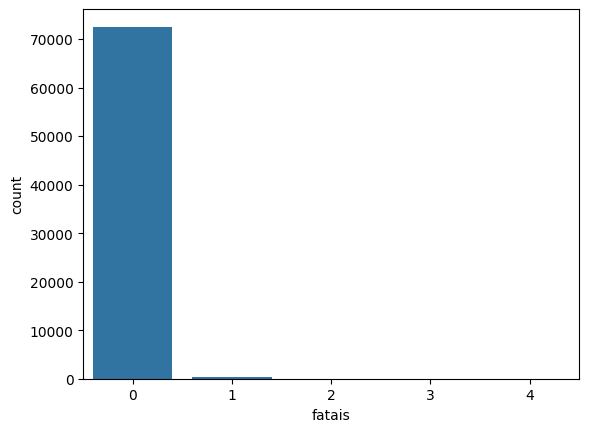

In [16]:
# Gráfico número de mortes
sns.countplot(x='fatais', data=df)
plt.show()

In [9]:
# Select para visualizar melhor o número de mortes
spark.sql("SELECT mortes, count(acidentes_table.idacidente) as quantidade FROM acidentes_table GROUP BY mortes").show()

+------+----------+
|mortes|quantidade|
+------+----------+
|     1|       204|
|     2|         8|
|     0|     72736|
|     3|         1|
+------+----------+



In [10]:
# Select para visualizar o total de mortes, fatais soma a coluna mortes e mortes_post
spark.sql("SELECT fatais, count(acidentes_table.idacidente) as quantidade FROM acidentes_table GROUP BY fatais").show()

+------+----------+
|fatais|quantidade|
+------+----------+
|     1|       395|
|     2|        10|
|     0|     72542|
|     3|         1|
|     4|         1|
+------+----------+



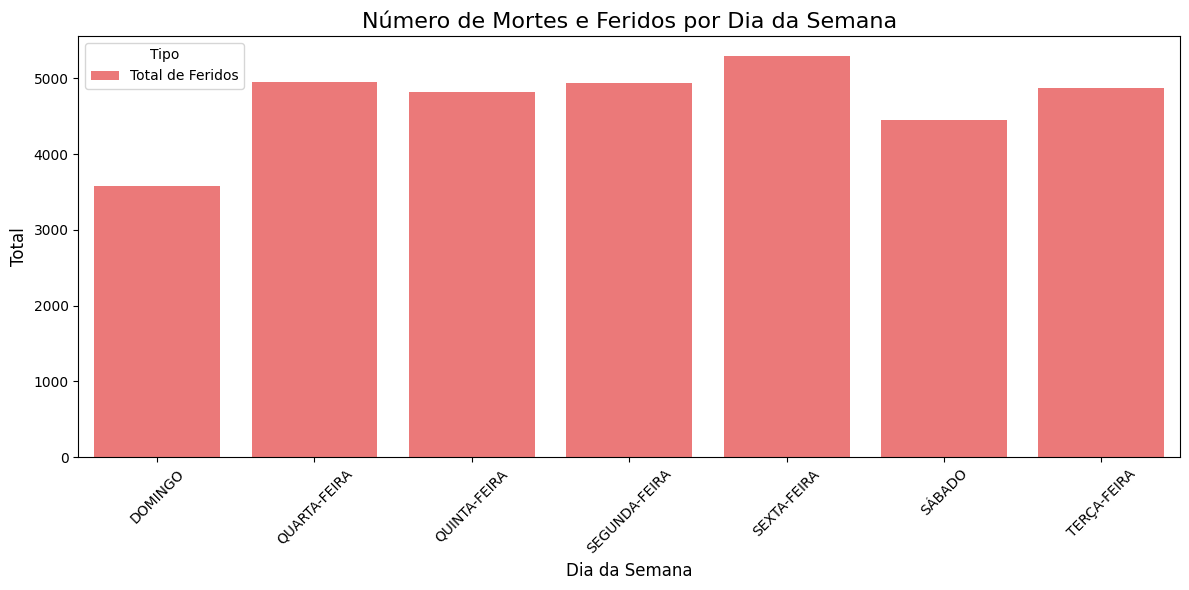

In [14]:
# Gráfico para visualizar a quantidade de feridos por dia de semana
df_grouped = df.groupby("dia_sem").agg({"feridos": "sum"}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="dia_sem", y="feridos", color="red", alpha=0.6, label="Total de Feridos")
plt.title("Número de Mortes e Feridos por Dia da Semana", fontsize=16)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Total", fontsize=12)
plt.legend(title="Tipo", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Select para visualizar a quantidade de feridos e de mortes por tipo de acidente
spark.sql("SELECT tipo_acid, sum(acidentes_table.fatais) as quantidade_mortes, sum(acidentes_table.feridos) as quantidade_feridos"+
           " FROM acidentes_table GROUP BY tipo_acid").show()

+--------------+-----------------+------------------+
|     tipo_acid|quantidade_mortes|quantidade_feridos|
+--------------+-----------------+------------------+
|  ABALROAMENTO|              104|             14056|
|NAO CADASTRADO|                1|              1894|
|      INCÊNDIO|                0|                 3|
| ATROPELAMENTO|              142|              4186|
|        CHOQUE|              103|              2362|
|    TOMBAMENTO|                1|                67|
|     CAPOTAGEM|                7|               245|
|      EVENTUAL|                0|               451|
|         QUEDA|               28|              2213|
|       COLISÃO|               36|              7439|
+--------------+-----------------+------------------+



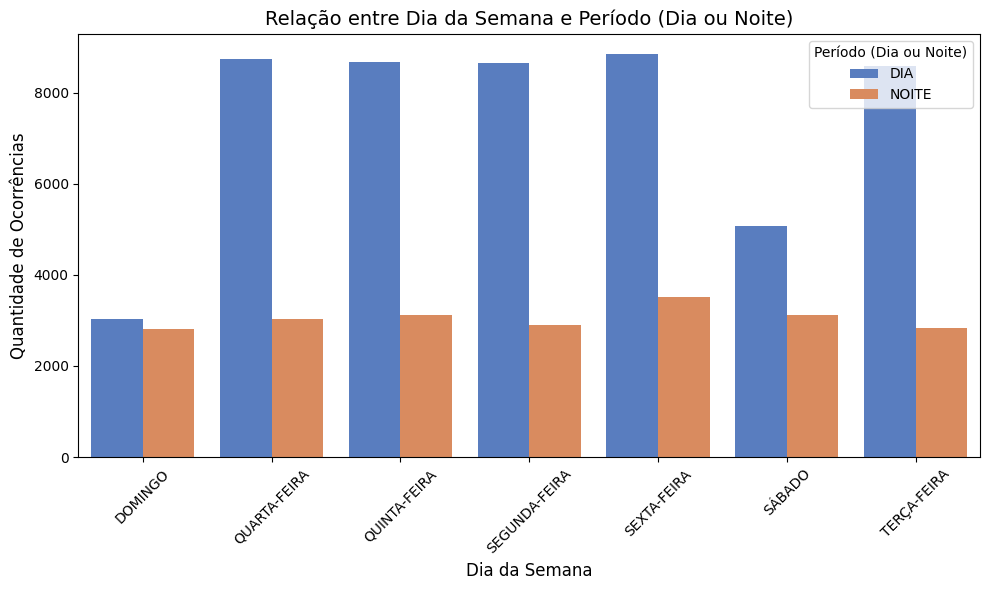

In [ ]:
# Gráfico para visualizar se ocorre mais mais ocorrências de DIA ou NOITE

contagem = df.groupby(["dia_sem", "noite_dia"]).size().reset_index(name="quantidade")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=contagem,
    x="dia_sem",
    y="quantidade",
    hue="noite_dia",
    palette="muted"
)
plt.title("Relação entre Dia da Semana e Período (Dia ou Noite)", fontsize=14)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Quantidade de Ocorrências", fontsize=12)
plt.legend(title="Período (Dia ou Noite)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Explicar os dados

In [ ]:
df.describe()

,data_extracao,predial1,queda_arr,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,...,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,total_mortes,total_feridos
count,72949,20000.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,...,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000
mean,2024-09-01 01:32:35.999999744,1515.566450,0.000507,0.451219,0.080316,0.003057,0.002728,0.005785,1.436168,0.018547,...,0.312259,0.000329,0.020124,0.001179,0.386599,2.591029,0.000233,698894.691771,0.005785,0.531536
min,2024-09-01 01:32:36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,190816.000000,0.000000,0.000000
25%,2024-09-01 01:32:36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,674319.000000,0.000000,0.000000
50%,2024-09-01 01:32:36,565.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,692695.000000,0.000000,0.000000
75%,2024-09-01 01:32:36,1990.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,730899.000000,0.000000,1.000000
max,2024-09-01 01:32:36,90010.000000,1.000000,34.000000,5.000000,3.000000,2.000000,4.000000,10.000000,2.000000,...,4.000000,1.000000,2.000000,2.000000,1.000000,13.000000,2.000000,749141.000000,4.000000,34.000000
std,NaN,2364.588506,0.022516,0.670259,0.294352,0.057872,0.052682,0.079198,0.766656,0.135832,...,0.491023,0.018135,0.141978,0.035105,0.486974,2.090074,0.016137,29118.598853,0.079198,0.826365


In [ ]:
# Select para visualizar a quantidade de vitimas fatais, feridos e cont_vit para visualizar a diferença
spark.sql("SELECT mortes, morte_post, fatais, feridos, cont_vit  FROM acidentes_table GROUP BY mortes, morte_post, fatais, feridos, cont_vit").show()

# ********** IDENTIFICADO QUE FATAIS É A SOMA DE MORTES E MORTE_POST ************
# ********** NÚMERO DE VITIMAS PARECE SER VITIMAS QUE PODEM TER SE ENVOLDIDO NO ACIDENTE, MAS NÃO NECESSARIAMENTE MORREU OU SE FERIU ************

+------+----------+------+-------+--------+
|mortes|morte_post|fatais|feridos|cont_vit|
+------+----------+------+-------+--------+
|     0|         0|     0|      0|       0|
|     2|         0|     2|      1|       1|
|     2|         0|     2|      0|       1|
|     0|         1|     1|      1|       1|
|     0|         0|     0|      3|       1|
|     0|         1|     1|      3|       1|
|     1|         0|     1|      2|       1|
|     1|         0|     1|      3|       1|
|     1|         0|     1|      4|       1|
|     0|         1|     1|      0|       1|
|     0|         0|     0|      2|       1|
|     0|         0|     0|      1|       1|
|     0|         0|     0|     25|       1|
|     0|         1|     1|      2|       1|
|     0|         2|     2|      0|       1|
|     0|         0|     0|      6|       1|
|     0|         0|     0|      4|       1|
|     1|         0|     1|      0|       1|
|     1|         0|     1|      1|       1|
|     0|         0|     0|      

In [ ]:
# Select para visualizar a coluna ups que é um dado numérico para gravidade do acidente
spark.sql("SELECT DISTINCT ups from acidentes_table").show()
spark.sql("SELECT ups, mortes, morte_post, fatais, feridos, cont_vit  FROM acidentes_table GROUP BY ups, mortes, morte_post, fatais, feridos, cont_vit").show()

print(df['ups'].value_counts())

+---+
|ups|
+---+
|  1|
| 13|
|  5|
+---+

+---+------+----------+------+-------+--------+
|ups|mortes|morte_post|fatais|feridos|cont_vit|
+---+------+----------+------+-------+--------+
| 13|     0|         1|     1|      3|       1|
| 13|     1|         0|     1|      1|       1|
|  5|     0|         0|     0|      1|       1|
| 13|     0|         1|     1|      1|       1|
|  5|     0|         0|     0|      4|       1|
|  1|     0|         0|     0|      0|       0|
|  5|     0|         0|     0|      7|       1|
| 13|     1|         0|     1|      3|       1|
|  5|     0|         0|     0|     25|       1|
| 13|     0|         2|     2|      0|       1|
| 13|     2|         0|     2|      1|       1|
| 13|     1|         0|     1|      0|       1|
| 13|     0|         1|     1|      0|       1|
|  5|     0|         0|     0|      6|       1|
| 13|     0|         1|     1|      2|       1|
| 13|     2|         0|     2|      0|       1|
|  5|     0|         0|     0|      3|       

#### Descrição das colunas:

In [19]:
df.dtypes

data_extracao    datetime64[ns]
predial1                float64
queda_arr               float32
data                     object
feridos                   int32
feridos_gr                int32
mortes                    int32
morte_post                int32
fatais                    int32
auto                      int32
taxi                      int32
lotacao                   int32
onibus_urb                int32
onibus_met                int32
onibus_int                int32
caminhao                  int32
moto                      int32
carroca                   int32
bicicleta                 int32
outro                     int32
cont_vit                  int32
ups                       int32
patinete                  int32
idacidente                int32
longitude                object
latitude                 object
log1                     object
log2                     object
tipo_acid                object
dia_sem                  object
hora                     object
noite_di

- data_extracao -> Data que foi importado os registros para o dataset público
- predial1 -> Número do edificio
- queda_arr -> Se o veículo caiu em algum riacho/rio
- data -> Data do acidente
- feridos -> Número de feridos
- feridos_gr -> Número de gravemente feridos
- mortes -> Número de mortes
- morte_post -> Número de mortes posteriormente
- fatais -> Número total de mortes (somando mortes e morte_post)
- auto -> Número de carros
- taxi -> Número de taxi
- lotacao -> Número de lotação
- onibus_urb -> Número de ônibus urbanos
- onibus_met -> Número de ônibus de outras cidades
- onibus_int -> Número de ônibus intermunicipais
- caminhao -> Número de caminhões 
- moto -> Número de motos
- carroca -> Número de carroças
- bicicleta -> Número de bicicletas
- outro -> Número de outros veículos diferente dos que estão listados anteriormente
- cont_vit -> Número de vitimas
- ups -> Unidade de gravidade padrão: Peso atribuído aos tipos de acidentes de acordo com a gravidade dos danos causados
- patinete -> Número de patinetes
- idacidente -> Id do acidente
- longitude -> Longitude do local do endereço
- latitude -> Latitude do local do endereço
- log1 -> Endereço do acidente
- log2 -> Complemente do endereço
- tipo_acid -> Tipo do acidente
- dia_sem -> Dia da semana que ocorreu o acidente
- hora -> Hora do acidente
- noite_dia -> Coluna que sinaliza se o acidente ocorreu durante o DIA ou NOITE
- regiao -> Região que ocorreu o acidente
- consorcio -> Consorcio do ônibus

### Decidir quais atributos serão úteis

In [ ]:
# Excluir colunas desnecessarias
# df.drop(columns=['predial1', 'queda_arr', 'mortes', 'morte_post', 'idacidente', 'consorcio', 'data_extracao'], inplace=True) 

# Versão 2 -> Pensando que nosso trabalho pode abordar somente se o usuário estiver dirigindo um veiculo/moto ou estar em um taxi
df.drop(columns=['predial1', 'queda_arr', 'mortes', 'morte_post', 'idacidente', 'consorcio', 'data_extracao','lotacao', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'carroca', 'bicicleta', 'outro', 'patinete'], inplace=True)

### Classificar as variáveis/atributo

In [35]:
df.describe()

,feridos,feridos_gr,fatais,auto,taxi,moto,cont_vit,ups
count,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000,72949.000000
mean,0.451219,0.080316,0.005785,1.436168,0.018547,0.312259,0.386599,2.591029
std,0.670259,0.294352,0.079198,0.766656,0.135832,0.491023,0.486974,2.090074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,5.000000
max,34.000000,5.000000,4.000000,10.000000,2.000000,4.000000,1.000000,13.000000


In [26]:
df.describe(include='object')

,data,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao
count,72949,62743,62743,72895,20300,72949,72949,72496,72949,72948
unique,2088,43541,44906,4215,2043,10,7,1377,2,4
top,2024-04-11,0,0,AV PROTASIO ALVES,AV IPIRANGA,ABALROAMENTO,SEXTA-FEIRA,18:00:00.0000000,DIA,LESTE
freq,82,594,594,2131,452,33099,12373,1141,51611,22994


- Hora e data seria necessário?

In [ ]:
df.drop(columns=['hora'], inplace=True)
df.drop(columns=['data'], inplace=True)

In [ ]:
#Criar coluna de gravidade em cima do valor de ups
def classificar_gravidade(ups):
    if ups <= 3:
        return "BAIXA"
    elif 4 <= ups <= 10:
        return "MEDIA"
    else:
        return "ALTA"

# Criar a nova coluna
df["gravidade_acidente"] = df["ups"].apply(classificar_gravidade)

### Separar entre previsores e classe

In [43]:
df.dtypes

feridos                int32
feridos_gr             int32
fatais                 int32
auto                   int32
taxi                   int32
moto                   int32
cont_vit               int32
ups                    int32
longitude             object
latitude              object
log1                  object
log2                  object
tipo_acid             object
dia_sem               object
noite_dia             object
regiao                object
gravidade_acidente    object
dtype: object

In [45]:
x = df[["log1", "log2", "latitude", "longitude", "dia_sem", "noite_dia"]]
y = df["gravidade_acidente"]

### Transformar as colunas

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder



### Padronizar os dados

### Dividir entre conjuntos de treino e teste

### Treinar um modelo de machine learning

### Reportar os resultados estatísticos